# **TPS - July 2021**

![](https://www.navy.ac.kr:10001/intro/images/sang_01.jpg)

## [Check This Notebook](https://www.kaggle.com/junhyeok99/pycaret-automl-baseline) If you wanna check **pycaret_baseline**

## **Focused On Air Pollution**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbDGlfpRiStDHa6mcsTgaPHyFpgwQPf3x27A&usqp=CAU)

# **Introduction**

### **This notebook shows EDA only. If you wanna check full notebook with modeling, [Click Here](https://www.kaggle.com/junhyeok99/automl-pycaret)**

 

## There are 5 sensors in train, test data. So we need to check about sensors
### Below image shows us a criteria about air pollution
\
\
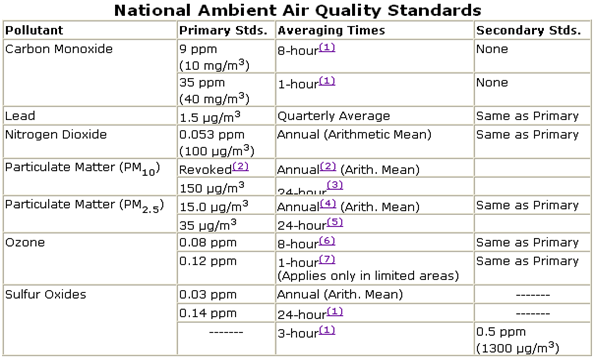

## Checking above image, we can guess about targets units! (ppm or etc..)


## *But we can't analyze sensor values with above image data*

## So, we need to check about relation between **sensor data** and **target values**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

train = pd.read_csv('../input/tabular-playground-series-jul-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-jul-2021/test.csv')
all_data = pd.concat([train, test])
all_data['date_time'] = pd.to_datetime(all_data['date_time'])
all_data['year'] = all_data['date_time'].dt.year
all_data['month'] = all_data['date_time'].dt.month
all_data['week'] = all_data['date_time'].dt.week
all_data['day'] = all_data['date_time'].dt.day
all_data['dayofweek'] = all_data['date_time'].dt.dayofweek
all_data['time'] = all_data['date_time'].dt.date - all_data['date_time'].dt.date.min()
all_data['hour'] = all_data['date_time'].dt.hour
all_data['time'] = all_data['time'].apply(lambda x : x.days)
all_data.drop(columns = 'date_time', inplace = True)
all_data['SMC'] = (all_data['absolute_humidity'] * 100) / all_data['relative_humidity']
all_data['Dew_Point'] = 243.12*(np.log(all_data['relative_humidity'] * 0.01) + (17.62 * all_data['deg_C'])/(243.12+all_data['deg_C']))/(17.62-(np.log(all_data['relative_humidity'] * 0.01)+17.62*all_data['deg_C']/(243.12+all_data['deg_C'])))
train2 = all_data[:len(train)]
test2 = all_data[len(train):]
train['SMC'] = train2['SMC']

In [ ]:
fig, ax = plt.subplots(5, 3, figsize = (10,13))

ax[0,0].plot(train2.groupby(train2['sensor_1'])['target_carbon_monoxide'].mean(), 'r');
ax[0,1].plot(train2.groupby(train2['sensor_1'])['target_benzene'].mean(), 'r');
ax[0,2].plot(train2.groupby(train2['sensor_1'])['target_nitrogen_oxides'].mean(), 'r');

ax[1,0].plot(train2.groupby(train2['sensor_2'])['target_carbon_monoxide'].mean(), 'b');
ax[1,1].plot(train2.groupby(train2['sensor_2'])['target_benzene'].mean(), 'b');
ax[1,2].plot(train2.groupby(train2['sensor_2'])['target_nitrogen_oxides'].mean(), 'b');

ax[2,0].plot(train2.groupby(train2['sensor_3'])['target_carbon_monoxide'].mean(), 'y');
ax[2,1].plot(train2.groupby(train2['sensor_3'])['target_benzene'].mean(), 'y');
ax[2,2].plot(train2.groupby(train2['sensor_3'])['target_nitrogen_oxides'].mean(), 'y');

ax[3,0].plot(train2.groupby(train2['sensor_4'])['target_carbon_monoxide'].mean(), 'black');
ax[3,1].plot(train2.groupby(train2['sensor_4'])['target_benzene'].mean(), 'black');
ax[3,2].plot(train2.groupby(train2['sensor_4'])['target_nitrogen_oxides'].mean(), 'black');

ax[4,0].plot(train2.groupby(train2['sensor_5'])['target_carbon_monoxide'].mean(), 'violet');
ax[4,1].plot(train2.groupby(train2['sensor_5'])['target_benzene'].mean(), 'violet');
ax[4,2].plot(train2.groupby(train2['sensor_5'])['target_nitrogen_oxides'].mean(), 'violet');

ax[0,0].set_title('sensor_1-CO')
ax[0,1].set_title('sensor_1-Benzene')
ax[0,2].set_title('sensor_1-NOx')

ax[1,0].set_title('sensor_2-CO')
ax[1,1].set_title('sensor_2-Benzene')
ax[1,2].set_title('sensor_2-NOx')

ax[2,0].set_title('sensor_3-CO')
ax[2,1].set_title('sensor_3-Benzene')
ax[2,2].set_title('sensor_3-NOx')

ax[3,0].set_title('sensor_4-CO')
ax[3,1].set_title('sensor_4-Benzene')
ax[3,2].set_title('sensor_4-NOx')

ax[4,0].set_title('sensor_5-CO')
ax[4,1].set_title('sensor_5-Benzene')
ax[4,2].set_title('sensor_5-NOx')

fig.tight_layout()
plt.show()

### With above visualization, we can guess that **target values and sensors values have proportionality relationship!**

### It's clear that **"sensor"** is in proportionality relationship with **"Degree of pollutant density"**
## **Because it is just a SENSOR to measure**

### So, we can clear to handle those outliers

### **If you wanna handle outliers or skewed data, you can use scaler(In my case, I used log-scaling)**

In [ ]:
tg = ['target_nitrogen_oxides', 'target_benzene', 'target_carbon_monoxide']
features = ['deg_C', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']
fig, ax = plt.subplots(len(tg), len(features), figsize=(20, 10))
n = 0
m = 0
for i in tg:
    m = 0
    for f in features:
        p = sns.regplot(train2.index, np.log(train2[i]) / train2[f], ax = ax[n, m]);
        p.set(xlabel = f, ylabel= i)
        m += 1
    n += 1
plt.tight_layout()
plt.show()

## **Time seires train & test data visualization**

####  - Refered to [LSTM Encoder-Decoder- starter (Keras)](https://www.kaggle.com/remekkinas/lstm-encoder-decoder-starter-keras)
#### To recognize the trend of data

In [ ]:
features = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4' ,'sensor_5', 'deg_C']
def plot_sensor(name):
    
    plt.figure(figsize=(16,4))

    plt.plot(all_data.index[:len(train)], train[name], label='train')
    plt.plot(all_data.index[len(train):] + len(train), test[name], label='test')
    plt.ylabel(name)
    plt.legend()
    plt.show()

for col in train[features].columns:
    plot_sensor(col)

## **↑↑↑Sensor_4 & deg_C data seem like have a similar trend↑↑↑**

## **Humidity & Target relationship**

In [ ]:
tg = ['target_nitrogen_oxides', 'target_benzene', 'target_carbon_monoxide']
features = ['relative_humidity', 'absolute_humidity']
fig, ax = plt.subplots(len(tg), len(features), figsize=(20, 10))
n = 0
m = 0
for i in tg:
    m = 0
    for f in features:
        p = sns.regplot(train2.index, np.log(train2[i]) / train2[f], ax = ax[n, m]);
        p.set(xlabel = f, ylabel= i)
        m += 1
    n += 1
plt.tight_layout()
plt.show()

### **HeatMap**

*   **Heatmap shows us that sensor 1~5 are influential feature**
*   **But 'sensor_3' looks different from others**

#### **Need to check sensor_3 feature_importance later!!**

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(train2.corr());

### **BoxPlot**

#### **Shows that Month data, Hour data are influential because of the temp!**

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (20,15))
sns.boxplot(train2['year'], train2['target_carbon_monoxide'], ax = ax[0, 0]);
sns.boxplot(train2['year'], train2['target_benzene'], ax= ax[0, 1]);
sns.boxplot(train2['year'], train2['target_nitrogen_oxides'], ax = ax[0, 2]);

sns.boxplot(train2['month'], train2['target_carbon_monoxide'], ax = ax[1, 0]);
sns.boxplot(train2['month'], train2['target_benzene'], ax= ax[1, 1]);
sns.boxplot(train2['month'], train2['target_nitrogen_oxides'], ax = ax[1, 2]);

sns.boxplot(train2['hour'], train2['target_carbon_monoxide'], ax = ax[2,0]);
sns.boxplot(train2['hour'], train2['target_benzene'], ax= ax[2,1]);
sns.boxplot(train2['hour'], train2['target_nitrogen_oxides'], ax = ax[2,2]);

plt.show();